In [1]:
import numpy as np
import pandas as pd
import psycopg2
from psycopg2.extras import execute_values

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Connect to Heroku database
try:
        conn = psycopg2.connect(host='ec2-52-201-66-148.compute-1.amazonaws.com', database='d44ns4ruujn4nq', port=5432,
                                user='ub5debmb55aodh', password='pe6a56f3002c3f1181d1a34e26d9a90636fdd56e1156bf39a6b8ff158a49bf163')
        print("successfully connected to database")
except:
        print("I am unable to connect to the database")

successfully connected to database


In [4]:
# Get sample data from table
cur = conn.cursor()

get_cols_query = "SELECT sqftmain, roll_landvalue, roll_landbaseyear, center_lat, center_lon from rawparceltable;"
sample_data = [];
try: 
    cur.execute(get_cols_query)
    sample_data = cur.fetchall()
    
    print("query successful")
except:
    print("query failed")

    
print(sample_data[0:10])

query successful
[('53135', '5361010', '2017', '33.985062650000003', '-117.84578183000001'), ('35582', '1548930', '1998', '33.984886459999998', '-117.84443419'), ('20748', '2144404', '2017', '33.984520269999997', '-117.84567337999999'), ('21300', '2831268', '2014', '33.969803720000002', '-117.84968676'), ('9145', '1421739', '2016', '33.986564299999998', '-117.84388033'), ('22080', '545804', '1998', '33.985976469999997', '-117.8440932'), ('68715', '7000000', '2006', '33.984608369999997', '-117.8472929'), ('9230', '715449', '1998', '33.985513949999998', '-117.84420249'), ('0', '2186863', '2019', '33.988427969999996', '-117.89380946999999'), ('1398', '35183', '1975', '33.9953231', '-117.88468788')]


In [5]:
# Create dataframe from sample_data
df = pd.DataFrame(sample_data, columns=['sqftmain', 'roll_landvalue', 'roll_landbaseyear', 'center_lat', 'center_lon'])

In [6]:
# Change data type to int and float
for col in df:
    if col == 'roll_landbaseyear':
        df[col] = df[col].astype(int)
    else:
        df[col] = df[col].astype(float)

# Add land value per square foot to dataframe
df['landvaluepersqft'] = df['roll_landvalue']/df['sqftmain']
df

,sqftmain,roll_landvalue,roll_landbaseyear,center_lat,center_lon,landvaluepersqft
0,53135.0,5361010.0,2017,33.985063,-117.845782,100.894138
1,35582.0,1548930.0,1998,33.984886,-117.844434,43.531280
2,20748.0,2144404.0,2017,33.984520,-117.845673,103.354733
3,21300.0,2831268.0,2014,33.969804,-117.849687,132.923380
4,9145.0,1421739.0,2016,33.986564,-117.843880,155.466266
...,...,...,...,...,...,...
887,1750.0,151554.0,2020,34.122579,-117.871441,86.602286
888,2280.0,299783.0,2015,34.130483,-117.866949,131.483772
889,49920.0,2621753.0,2014,34.133712,-117.871951,52.519091
890,3040.0,110042.0,1984,34.106922,-117.866998,36.198026


In [8]:
# Clean data
df= df[df['sqftmain'] != 0]
df= df[df['landvaluepersqft'] < 500]
df

,sqftmain,roll_landvalue,roll_landbaseyear,center_lat,center_lon,landvaluepersqft
0,53135.0,5361010.0,2017,33.985063,-117.845782,100.894138
1,35582.0,1548930.0,1998,33.984886,-117.844434,43.531280
2,20748.0,2144404.0,2017,33.984520,-117.845673,103.354733
3,21300.0,2831268.0,2014,33.969804,-117.849687,132.923380
4,9145.0,1421739.0,2016,33.986564,-117.843880,155.466266
...,...,...,...,...,...,...
887,1750.0,151554.0,2020,34.122579,-117.871441,86.602286
888,2280.0,299783.0,2015,34.130483,-117.866949,131.483772
889,49920.0,2621753.0,2014,34.133712,-117.871951,52.519091
890,3040.0,110042.0,1984,34.106922,-117.866998,36.198026


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [10]:
# Set dependent and independent variables
X = pd.DataFrame(df[['roll_landbaseyear','center_lat', 'center_lon']])
y = pd.DataFrame(df['landvaluepersqft']) 

In [11]:
# Split data randomly - 30% used for test data; 70% used for training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Create kNN Model
knn= KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [13]:
# Create predictions for test data
y_pred = knn.predict(X_test)

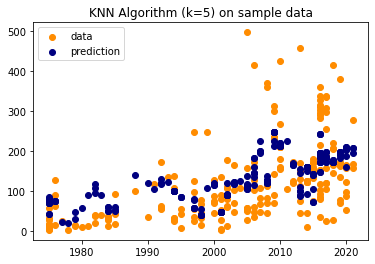

In [14]:
# Evaluate model
plt.scatter(X_test['roll_landbaseyear'], y_test, color="darkorange", label="data")
plt.scatter(X_test['roll_landbaseyear'], y_pred, color="navy", label="prediction")
plt.axis("tight")
plt.legend()
plt.title("KNN Algorithm (k=5) on sample data")
plt.show()

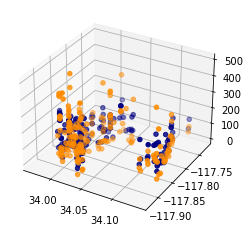

In [19]:
ax = plt.axes(projection='3d')
ax.scatter3D(X_test['center_lat'], X_test['center_lon'], y_test, color="darkorange", label="data")
ax.scatter3D(X_test['center_lat'], X_test['center_lon'], y_pred, color="navy", label="prediction")
plt.show()

In [15]:
error = sqrt(mean_squared_error(y_test,y_pred))
error

86.27536648583647